# Assessment: Part 2 - Optimisation
<br>

## Task: Optimise a timetable so that session is scheduled once per week in such a way that timetable constraints are minimised. 
<br>

### Relevant constraints for this assessment are: 

- A session cannot be scheduled for a time when any of its students or staff are in another session (concurrence constraints). The sessions for a module that clash are shown in the data file.
- A lab session cannot occur in the week before its corresponding lecture has taken place (precedence constraints).
<br>
<br>

### Packages needed:

- pandas
- sklearn
- numpy
- matplotlib

### 2.1 – Generation of random solutions

#### Importing libraries

In [222]:
import numpy as np
import random
import matplotlib.pyplot as plt

#### Reading the file and splitting it

In [223]:
filepath = "./Modules.txt"

#Read file into list
file = open(filepath, 'r')
contents = file.read()
file.close()

#split it
fileContents = contents.split("\n")

#different arrays
clashes = []
modules = []
labs = []
amount_labs = []

#put respective elements into array
for i in range(len(fileContents)):
    clashes.append(fileContents[i].split("|"))
    modules.append(clashes[i].pop(0))
    clashes[i].pop(0)
    labs.append(clashes[i].pop(0))

for x in range(len(clashes)):
    clashes[x].append(clashes[x][0].split(","))
    clashes[x].pop(0)

for i in range(len(labs)):
    amount_labs.append(int(labs[i][0]))


print(f"{modules}\n{amount_labs}\n{clashes}")

['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013', 'MOD014', 'MOD015', 'MOD016', 'MOD017']
[2, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1]
[[['MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD013']], [['MOD001', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD013']], [['MOD001', 'MOD002', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013']], [['MOD001', 'MOD002', 'MOD003', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013']], [['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012']], [['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012']], [['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD008', 'MOD009', 'MOD010', 

#### Concurrent Constraints - A session cannot be scheduled for a time when any of its students or staff are in another session

#### Precedence Constraints - A lab session cannot occur in the week before its corresponding lecture has taken place

In [224]:
def concurrent_clashes(lab, module):

    concurrent_constraints = 0
    precedence_constraints = 0
    # Check for clashes.
    
    if len(lab) < len(module):
        count = len(lab)
    else:
        count = len(module)


    for i in range(count):
        if module[i] == lab[i]:
            concurrent_constraints = concurrent_constraints + 1
        for j in range(i):
            if j < i:
                if module[j] == lab[j]: # if lab is before lecture
                    precedence_constraints = precedence_constraints + 1
                    break

    return concurrent_constraints, precedence_constraints

#### Concurrent Constraints - A session cannot be scheduled for a time when any of its students or staff are in another session

In [225]:
def modules_clashes(lab, module):

    concurrent_constraints = 0
    module_element = np.array_split(modules, 17)
    
    for i in range(len(module_element)):
        for j in range(len(clashes[i])):
            module_element[i] = np.concatenate([module_element[i], clashes[i][j]])

    if len(lab) < len(module):
        count = len(lab)
    else:
        count = len(module)

    #find matching module
    for i in range(count):
        for j in range(len(module_element)):
            if module[i] == module_element[j][0]:
                if lab[i] is not None and lab[i] in module_element[j] and lab[i] != module_element[j][0]:
                    concurrent_constraints = concurrent_constraints + 1
                    break

    return concurrent_constraints

#### Total Constraints

In [226]:
def total_constraints(timetable):

    concurrent_constraints = [int] * 4
    precedence_constraints = [int] * 2
    total_concurrent_constraints = 0
    total_precedence_constraints = 0

    concurrent_constraints[0], precedence_constraints[0] = concurrent_clashes(timetable[1], timetable[0])
    concurrent_constraints[1], precedence_constraints[1] = concurrent_clashes(timetable[2], timetable[0])

    concurrent_constraints[2] = modules_clashes(timetable[1], timetable[0])
    concurrent_constraints[3] = modules_clashes(timetable[2], timetable[0])

    for x in range(len(concurrent_constraints)):
        total_concurrent_constraints = total_concurrent_constraints + concurrent_constraints[x]
    for y in range(len(precedence_constraints)):
        total_precedence_constraints = total_precedence_constraints + precedence_constraints[y]

    return total_concurrent_constraints, total_precedence_constraints

#### Calculating fitness

In [227]:
def return_fitness(timetable): 

    total_concurrent_constraints, total_precedence_constraints = total_constraints(timetable)
    fitness = total_concurrent_constraints * total_precedence_constraints

    return(fitness)

#### Generating random timetable

In [228]:
def generate_timetable():
    lectures = []
    lab_1 = []
    lab_2 = []
    timetable = np.empty([3, 20], dtype=object)
    
    #lab sessions
    lab_sessions = []
    for i in range(len(modules)):
        for j in range(len(labs[i])):
            lab_sessions.append(modules[i])

    for i in range(len(modules)):
        lectures.append(modules[i])

    for i in range(len(lab_sessions)):
        if i <= 20:
            lab_1.append(lab_sessions[i])
        if i > 20 and i < len(lab_sessions):
            lab_2.append(lab_sessions[i])

    for i in range(len(lectures)):
        timetable[0][i] = lectures[i]
    for i in range(len(lab_1)):
        timetable[1][i] = lab_1[i]
    for i in range(len(lab_2)):
        timetable[2][i] = lab_2[i]

    # Shuffle the lectures and labs so the solution is random.
    random.shuffle(timetable[0])
    random.shuffle(timetable[1])
    random.shuffle(timetable[2])
    
    fitness = return_fitness(timetable)
    
    return timetable, fitness


### 2.2 – Algorithm implementation

#### Ruin and Recreate Mutation - generates a completely new solution at random

In [229]:
def ruin_recreate(parent):
    child = parent.copy()
    for i in range(len(child)):
        random.shuffle(child[i])
    return child

#### Session Replace Mutation - placing a session into another slot in the timetable

In [230]:
def session_replace(parent):
    child = parent.copy()
    idx = random.randint(0, 2)
    session_1 = random.randint(0, 19)
    session_2 = random.randint(0, 19)
    child[idx][session_1], child[idx][session_2] = child[idx][session_2], child[idx][session_1]
    return child

In [231]:
def less_than_equal(a ,b):
    return a <= b

#### Hillclimber:

- generating random solution
- using either mutation
- generate a child through mutation
- compare parent and child's fitness
- return best fitness

In [232]:
def hillclimber(N, generate_timetable, mutation, comparison):

    #random solution
    parent, parent_fitness = generate_timetable()
    
    for iter in range(N):
        
        # Mutate child
        child = mutation(parent)

        # Evaluate fitness
        child_fitness = return_fitness(child)

        # Pick the next parent solution
        if comparison(child_fitness, parent_fitness):
            parent = child
            parent_fitness = child_fitness
        
    return parent, parent_fitness

###  2.3 – Visualisation of results

In [233]:
def plot_graph(fitness, mutation_name):

    max_fitness_list = []
    min_fitness_list = []
    average_fitness_list = []

    for i in range(len(fitness)):
        worst_fitness = 0
        best_fitness = float("inf")
        total = 0
        for item in fitness:
            if item > worst_fitness:
                worst_fitness = item
            if item < best_fitness:
                best_fitness = item      
            total += item

        average = total / len(fitness)
        max_fitness_list.append(worst_fitness)
        average_fitness_list.append(average)
        min_fitness_list.append(best_fitness)
    
    print(average_fitness_list)
    plt.plot(max_fitness_list)
    plt.plot(average_fitness_list)
    plt.plot(min_fitness_list)
    plt.title(f"Timetable Fitness Scores - {mutation_name}")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.legend(["Minimum", "Mean", "Maximum"], loc=(1,0.5))
    plt.show()

Ruin and Recreate: [45, 42, 39, 50, 39, 50, 44, 36, 56, 40, 30, 40, 16, 30, 18, 26, 40, 70, 65, 30, 40, 22, 44, 39, 36, 27, 36, 26, 60, 42]
Session Replace: [24, 10, 15, 20, 40, 33, 8, 16, 6, 24, 9, 20, 39, 32, 20, 9, 12, 6, 28, 16, 12, 12, 12, 21, 36, 21, 10, 36, 12, 16]
[39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666, 39.266666666666666]


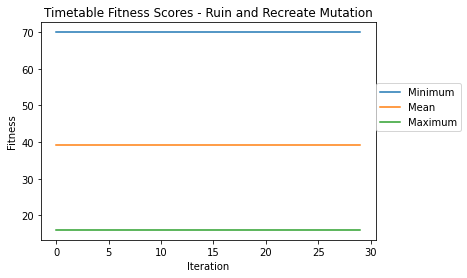

[19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668, 19.166666666666668]


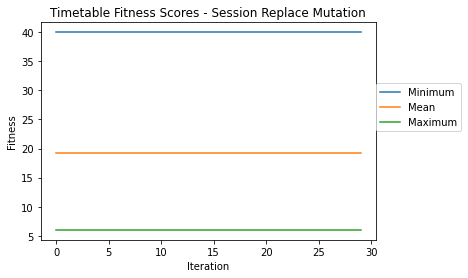

In [234]:
def results():
    sessionReplaceList = []
    RuinNRecreateList = []
    
    for i in range(30):

        # Run hillclimber here
        solution, fitness = hillclimber(500, generate_timetable, ruin_recreate, less_than_equal)
        solution2, fitness2 = hillclimber(500, generate_timetable, session_replace, less_than_equal)
        sessionReplaceList.append(fitness2)
        RuinNRecreateList.append(fitness)

    print(f"Ruin and Recreate: {RuinNRecreateList}")
    print(f"Session Replace: {sessionReplaceList}")

    plot_graph(RuinNRecreateList, "Ruin and Recreate Mutation")
    plot_graph(sessionReplaceList, "Session Replace Mutation")
    
results()